In [1]:
#######################
# standard code block #
#######################

# see https://ipython.readthedocs.io/en/stable/interactive/magics.html
%pylab inline

# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

# uses custom metis style sheet for notebooks
from IPython.core.display import HTML
HTML("""<link rel="stylesheet" href="https://soph.info/metis/nb.css" type="text/css"/>""")


import pickle
import re
import string
import nltk
import pandas as pd
import spacy
import re
import string
from gensim import matutils, models
import scipy.sparse
from collections import Counter
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# spacy.prefer_gpu()
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# from sklearn.datasets import fetch_mldata
from sklearn.utils import shuffle


Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd
data_df = pd.read_pickle('cleaned_list_df.pickle')


In [3]:
data_df

0       \
wsb                in the future when apple is at  a share your g...   
science             the children were not motivated by achieving ...   
ama                               tldr do whatever the fuck you want   
askreddit          victorias secret was originally supposed to be...   
worldnews                so was there any posts left after the purge   
funny                                  but i wanted the robot ferret   
dankmemes          meme of the month seeding and nominations for ...   
memes              redditmc is opening staff positions builders h...   
nosleep            it looks like there may be more to this story ...   
psychology          decisions regarding mental health care canada...   
politics           wait hold the fucking phone  he spent like  mi...   
cscareerquestions  hi there  i ve been looking for a stable job f...   
writingprompts     holy mackerel you guys the spotlight is for wr...   

                                                              1       \
wsb                you ever stare at your account and think wow h...   
science            also proved children like to gamble according ...   
ama                   so youre telling me people on the internet lie   
askreddit          the ford mustang  it was supposed to be a car ...   
worldnews          ok just for some context  facebook has an esti...   
funny              haha suck it you fools i already got my roboti...   
dankmemes          dont have any examples and im not sure if it c...   
memes                          using this to see if i have new flair   
nosleep            some series get old after a couple updates thi...   
psychology          public perceptions of exonerees through crime...   
politics           trump on harris nasty woman  trump on clinton ...   
cscareerquestions  hello people i hope yall are doing good i was ...   
writingprompts     congrats ucalamityjeans   as tens said i hope ...   

                                                              2       \
wsb                                           buy  at the top gang 🤡   
science            kind of like how gamers go through rpg games e...   
ama                                                                    
askreddit                              heels if i remember correctly   
worldnews          they still havent taken down my post about mar...   
funny                this not funny rule number oh i forget carry on   
dankmemes                                     certified hood classic   
memes                                       cries in bedrock edition   
nosleep            omg man with the skull cap is the mvp this tim...   
psychology          does child engagement in household tasks pred...   
politics           i could listen to kamala all day every day spe...   
cscareerquestions  company  apple  i am a bot and this action was...   
writingprompts     congratulations it looks like youve been overl...   

                                                              3       \
wsb                almost responded to an email with thanks retar...   
science            i teach elementary pe  to  year olds one of th...   
ama                this is so funny this subreddit got fucked by ...   
askreddit          is this how family feud gets new questions and...   
worldnews          why does facebook have a fake news problem  be...   
funny                            but the nigerian guy is legit right   
dankmemes                              arnold schwarzerunner godtier   
memes                         thank you thats very cash money of you   
nosleep            this update otherwise known as ive had it with...   
psychology          study on attitudes toward police  law enforce...   
politics           petty fucking manchild   cant stand biden and ...   
cscareerquestions  company  netflix  i am a bot and this action w...   
writingprompts     oh yay  ive seen you around on prompts and enj...   

                          

In [4]:

wsb = data_df.T['wsb'].tolist()
data_df
sci = data_df.T['writingprompts'].tolist()
sci

['holy mackerel you guys the spotlight is for writer writers not hacks who write in the notes app like me   in all seriousness writing for this community has meant a lot to me this summer thanks pandemic im so deeply appreciative of everything you mods do to keep this a supportive interesting place im sticking around httpsmyoutubecomwatchvhgzgwkwlmgm',
 'congrats ucalamityjeans   as tens said i hope this might spur you to make a personal subreddit where i can keep up with your writing   i have to say you are killing it you take prompts in directions that are definitely unexpected but not at all a reach for instance your  was aces youve done it in seus as well of course your dialogue is onpoint although you dont spend a lot of time establishing settings or characters i never really feel lost reading what you are putting out   i really hope you stick around this year  nbsp  as is tradition i hope youll indulge me in some random qa   what makes you want to write   how would you describe y

In [5]:
# wsb = data_df.text['wsb']
# wsb.split()

In [6]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

cvn = TfidfVectorizer(ngram_range=(1,1))
data_cvn = cvn.fit_transform(sci)
sci_dtm = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names()).T
# wsb.columns = data_df.index
sci_dtm

0       1       2       3       4       5       6       \
aaaaaaaaahhhhh     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
aaaaah             0.0     0.0     0.0     0.0     0.0     0.0     0.0   
aaaaand            0.0     0.0     0.0     0.0     0.0     0.0     0.0   
aaaand             0.0     0.0     0.0     0.0     0.0     0.0     0.0   
aaah               0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...                ...     ...     ...     ...     ...     ...     ...   
ᴡʜᴏsᴇ              0.0     0.0     0.0     0.0     0.0     0.0     0.0   
ᴡᴀɴᴛ               0.0     0.0     0.0     0.0     0.0     0.0     0.0   
ᴡᴇʀᴇᴡᴏʟᴠᴇs         0.0     0.0     0.0     0.0     0.0     0.0     0.0   
ᴡᴏʀʟᴅ              0.0     0.0     0.0     0.0     0.0     0.0     0.0   
ᴡᴏʀʟᴅs             0.0     0.0     0.0     0.0     0.0     0.0     0.0   

                7       8       9       ...  101131  101132  101133  101134  \
aaaaaaaaahhhhh     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0   
aaaaah             0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0   
aaaaand            0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0   
aaaand             0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0   
aaah               0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0   
...                ...     ...     ...  ...     ...     ...     ...     ...   
ᴡʜᴏsᴇ              0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0   
ᴡᴀɴᴛ               0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0   
ᴡᴇʀᴇᴡᴏʟᴠᴇs         0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0   
ᴡᴏʀʟᴅ              0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0   
ᴡᴏʀʟᴅs             0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0   

                101135  101136  101137  101138  101139  101140  
aaaaaaaaahhhhh     0.0     0.0     0.0     0.0     0.0     0.0  
aaaaah             0.0     0.0     0.0     0.0     0.0     0.0  
aaaaand            0.0     0.0     0.0     0.0     0.0     0.0  
aaaand             0.0     0.0     0.0     0.0     0.0     0.0  
aaah               0.0     0.0     0.0     0.0     0.0     0.0  
...                ...     ...     ...     ...     ...     ...  
ᴡʜᴏsᴇ              0.0     0.0     0.0     0.0     0.0     0.0  
ᴡᴀɴᴛ               0.0     0.0     0.0     0.0     0.0     0.0  
ᴡᴇʀᴇᴡᴏʟᴠᴇs         0.0     0.0     0.0     0.0     0.0     0.0  
ᴡᴏʀʟᴅ              0.0     0.0     0.0     0.0     0.0     0.0  
ᴡᴏʀʟᴅs             0.0     0.0     0.0     0.0     0.0     0.0  

[26290 rows x 101141 columns]

In [7]:
from textblob import TextBlob

vec = TfidfVectorizer()
matrix = vec.fit_transform(sci)
idf_df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
idf_df

aaaaaaaaahhhhh  aaaaah  aaaaand  aaaand  aaah  aaand  \
0                  0.0     0.0      0.0     0.0   0.0    0.0   
1                  0.0     0.0      0.0     0.0   0.0    0.0   
2                  0.0     0.0      0.0     0.0   0.0    0.0   
3                  0.0     0.0      0.0     0.0   0.0    0.0   
4                  0.0     0.0      0.0     0.0   0.0    0.0   
...                ...     ...      ...     ...   ...    ...   
101136             0.0     0.0      0.0     0.0   0.0    0.0   
101137             0.0     0.0      0.0     0.0   0.0    0.0   
101138             0.0     0.0      0.0     0.0   0.0    0.0   
101139             0.0     0.0      0.0     0.0   0.0    0.0   
101140             0.0     0.0      0.0     0.0   0.0    0.0   

        aaauuuuuuuuuggggggghhhhhhh  aah  aam  aand  ...  ᴡɪᴢᴀʀᴅs  ᴡʜɪᴄʜ  ᴡʜᴀᴛ  \
0                              0.0  0.0  0.0   0.0  ...      0.0    0.0   0.0   
1                              0.0  0.0  0.0   0.0  ...      0.0    0.0   0.0   
2                              0.0  0.0  0.0   0.0  ...      0.0    0.0   0.0   
3                              0.0  0.0  0.0   0.0  ...      0.0    0.0   0.0   
4                              0.0  0.0  0.0   0.0  ...      0.0    0.0   0.0   
...                            ...  ...  ...   ...  ...      ...    ...   ...   
101136                         0.0  0.0  0.0   0.0  ...      0.0    0.0   0.0   
101137                         0.0  0.0  0.0   0.0  ...      0.0    0.0   0.0   
101138                         0.0  0.0  0.0   0.0  ...      0.0    0.0   0.0   
101139                         0.0  0.0  0.0   0.0  ...      0.0    0.0   0.0   
101140                         0.0  0.0  0.0   0.0  ...      0.0    0.0   0.0   

        ᴡʜᴇʀᴇ  ᴡʜᴏ  ᴡʜᴏsᴇ  ᴡᴀɴᴛ  ᴡᴇʀᴇᴡᴏʟᴠᴇs  ᴡᴏʀʟᴅ  ᴡᴏʀʟᴅs  
0         0.0  0.0    0.0   0.0         0.0    0.0     0.0  
1         0.0  0.0    0.0   0.0         0.0    0.0     0.0  
2         0.0  0.0    0.0   0.0         0.0    0.0     0.0  
3         0.0  0.0    0.0   0.0         0.0    0.0     0.0  
4         0.0  0.0    0.0   0.0         0.0    0.0     0.0  
...       ...  ...    ...   ...         ...    ...     ...  
101136    0.0  0.0    0.0   0.0         0.0    0.0     0.0  
101137    0.0  0.0    0.0   0.0         0.0    0.0     0.0  
101138    0.0  0.0    0.0   0.0         0.0    0.0     0.0  
101139    0.0  0.0    0.0   0.0         0.0    0.0     0.0  
101140    0.0  0.0    0.0   0.0         0.0    0.0     0.0  

[101141 rows x 26290 columns]

In [8]:
# KMeans clustering a kind of clustering.
from sklearn.cluster import KMeans

number_of_clusters=20
km = KMeans(n_clusters=number_of_clusters)
# Normally people fit the matrix
km.fit(matrix)
# But you could fit the idf_df instead
# km.fit

KMeans(n_clusters=20)

In [9]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: none forgers forestry forests foresty
Cluster 1: part two out rchrischang subreddit
Cluster 2: that to and of more
Cluster 3: and iconhelp comments any or
Cluster 4: the to and of my
Cluster 5: thanks for reading the it
Cluster 6: the of to and in
Cluster 7: good this is really its
Cluster 8: this like was to of
Cluster 9: done well that was this
Cluster 10: love this it to id
Cluster 11: the of to and he
Cluster 12: the her she to and
Cluster 13: thank you much very for
Cluster 14: amazing this is was you
Cluster 15: it to the and that
Cluster 16: is this the that to
Cluster 17: please continue more part do
Cluster 18: you to the it and
Cluster 19: dave its me is that


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(np.asarray(idf_df))


KMeans(n_clusters=4)

In [19]:
y_kmeans = kmeans.predict(np.asarray(idf_df))

In [13]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

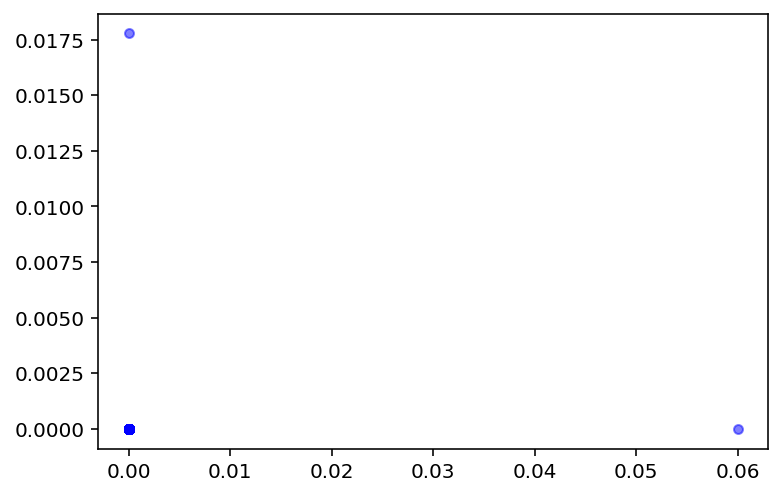

In [20]:
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
display_cluster(np.asarray(idf_df))

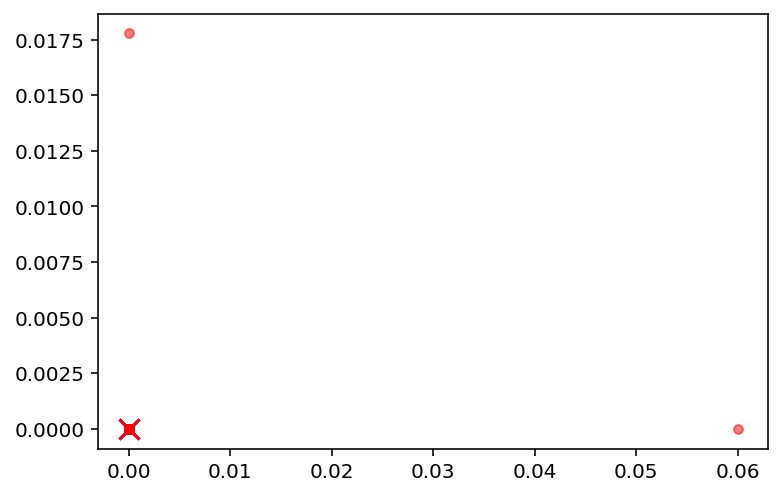

In [21]:
num_clusters = 2
km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
km.fit(np.asarray(idf_df))
display_cluster(np.asarray(idf_df),km,num_clusters)

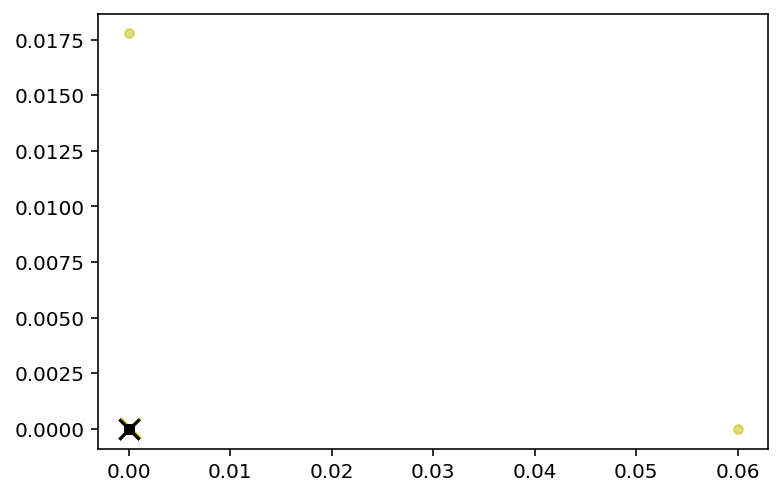

In [22]:
num_clusters = 7
km = KMeans(n_clusters=num_clusters)
km.fit(np.asarray(idf_df))
display_cluster(np.asarray(idf_df),km,num_clusters)